In [ ]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
!pip install gensim
!pip install nltk
import nltk
import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=0d430ea2c4b88bc9403359142b0633e05a0986282448e4d5d513aa418c8fdd34
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/dataset")
from mnist import load_mnist

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
os.chdir("/gdrive/My Drive/Colab Notebooks/Bottom Deeplearning/deep-learning-from-scratch-master/ch07")
from multi_layer_net import MultiLayerNet
from multi_layer_net_extend import MultiLayerNetExtend
from optimizer import SGD, Adam
from util import shuffle_dataset
from trainer import Trainer



# 데이터 분리

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 일단 섞음
x_train, t_train = shuffle_dataset(x_train,t_train)
# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]



# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]



# Architecture 형성 

In [ ]:

def __train(lr,weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='adam', optimizer_param={'lr': lr},verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list




# Hyper params 최적 값 찾기

In [ ]:
# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-5, -1)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list


val acc:0.8 | lr:0.00016712760814319304, weight decay:0.011280631180938933
val acc:0.78 | lr:0.0019907507547220426, weight decay:0.01656506076751116
val acc:0.58 | lr:7.543810294042786e-05, weight decay:0.09705290375913371
val acc:0.11 | lr:7.316955063131495e-06, weight decay:0.04737352732192512
val acc:0.85 | lr:0.0012759335435451543, weight decay:0.0047920961297628455
val acc:0.76 | lr:0.0023681485191986993, weight decay:0.07100773491031206
val acc:0.12 | lr:6.535138060367172e-06, weight decay:4.694779482592025e-05
val acc:0.79 | lr:0.008592598617485637, weight decay:0.013326517667656338
val acc:0.29 | lr:5.2210071568950334e-05, weight decay:0.07206799126980118
val acc:0.88 | lr:0.00180604520065724, weight decay:1.139004640736678e-05
val acc:0.83 | lr:0.00576636202829979, weight decay:0.0020460834669015996
val acc:0.14 | lr:1.2041333027127947e-06, weight decay:0.04610833976018946
val acc:0.85 | lr:0.0036955798523561024, weight decay:9.782281754021505e-05
val acc:0.54 | lr:4.487380915

In [ ]:
results_train.keys()

dict_keys(['lr:0.00016712760814319304, weight decay:0.011280631180938933', 'lr:0.0019907507547220426, weight decay:0.01656506076751116', 'lr:7.543810294042786e-05, weight decay:0.09705290375913371', 'lr:7.316955063131495e-06, weight decay:0.04737352732192512', 'lr:0.0012759335435451543, weight decay:0.0047920961297628455', 'lr:0.0023681485191986993, weight decay:0.07100773491031206', 'lr:6.535138060367172e-06, weight decay:4.694779482592025e-05', 'lr:0.008592598617485637, weight decay:0.013326517667656338', 'lr:5.2210071568950334e-05, weight decay:0.07206799126980118', 'lr:0.00180604520065724, weight decay:1.139004640736678e-05', 'lr:0.00576636202829979, weight decay:0.0020460834669015996', 'lr:1.2041333027127947e-06, weight decay:0.04610833976018946', 'lr:0.0036955798523561024, weight decay:9.782281754021505e-05', 'lr:4.4873809154468115e-05, weight decay:0.0004907288542791135', 'lr:4.6327238658117356e-05, weight decay:0.009245193103501087', 'lr:5.202348761619644e-06, weight decay:4.37

# 시각화 : 그래프 그리기

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.88) | lr:0.00180604520065724, weight decay:1.139004640736678e-05
Best-2(val acc:0.87) | lr:0.0048011561549825485, weight decay:6.301293682947588e-05
Best-3(val acc:0.86) | lr:0.0016329101111566804, weight decay:8.307762158975234e-05
Best-4(val acc:0.86) | lr:0.001119882621694896, weight decay:0.0034164330140341514
Best-5(val acc:0.86) | lr:0.00034427687424875035, weight decay:0.0022100538170520766
Best-6(val acc:0.86) | lr:0.001108029177425323, weight decay:2.303706820851548e-05
Best-7(val acc:0.85) | lr:0.0012759335435451543, weight decay:0.0047920961297628455
Best-8(val acc:0.85) | lr:0.0036955798523561024, weight decay:9.782281754021505e-05
Best-9(val acc:0.85) | lr:0.001276395577622145, weight decay:0.009258549386931858
Best-10(val acc:0.85) | lr:0.0007658229762871454, weight decay:0.001388909462784877
Best-11(val acc:0.85) | lr:0.00040139080450717014, weight decay:0.010220356303965882
Best-12(val acc:0.85

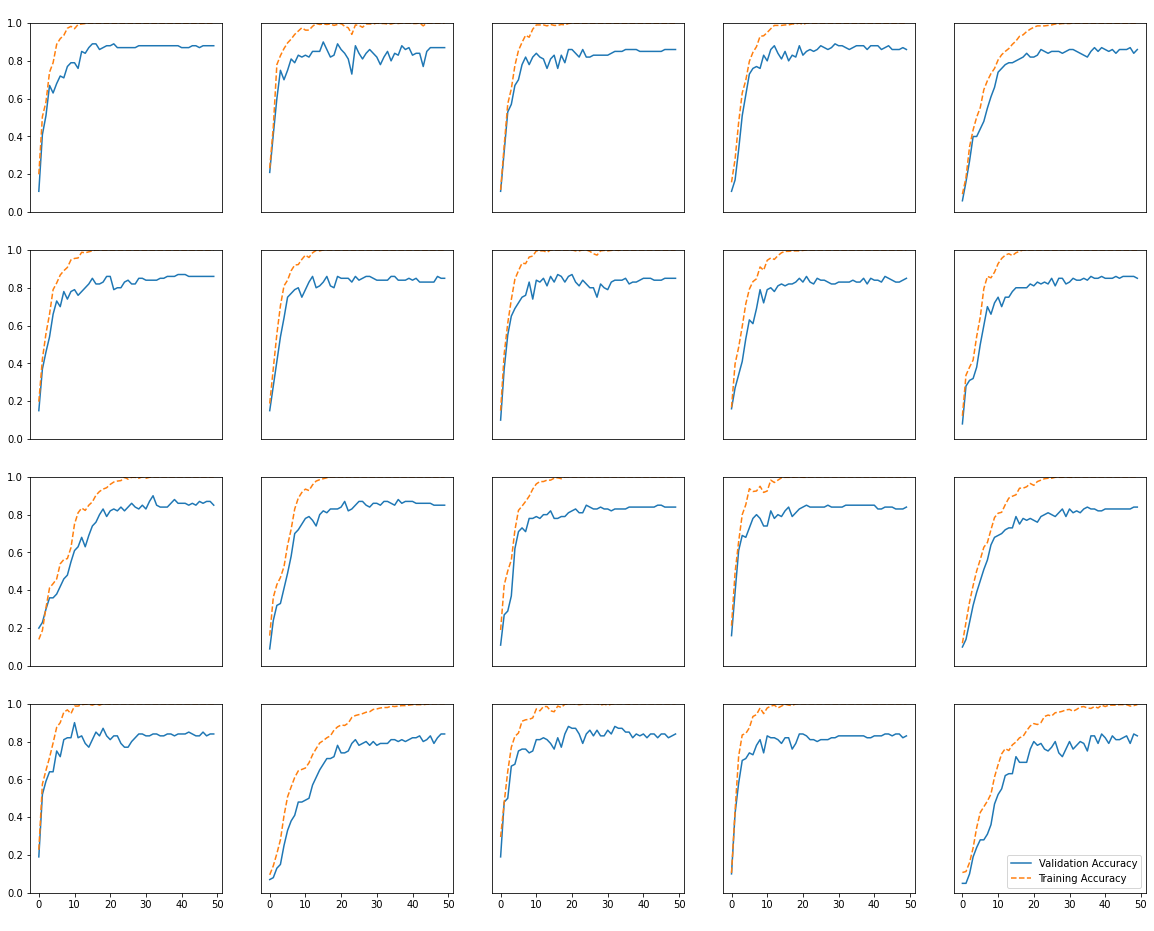

In [ ]:
# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(20,16))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1),color='white')
    plt.ylim(0.0, 1.0)
    if i % col_num : plt.yticks([])
    if i < 15:
        plt.xticks([],color='white')
    else:
        plt.xlabel("epochs",color='white')
    
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list,label="Validation Accuracy")
    plt.plot(x, results_train[key], "--",label="Training Accuracy")
    

    i += 1

    if i >= graph_draw_num:
        break

plt.legend(loc='lower right')
plt.show()